# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

C:\Users\Srira\AppData\Local\Temp\ipykernel_11948\2764143968.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [3]:
# Importing the dataset
data = pd.read_csv('50_Startups.csv')

In [4]:
# Checking the Dataset
print(data.head())

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


In [5]:
data.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [53]:
# Check The Shape of Dataset
data.shape

(50, 4)

In [6]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [7]:
#Check the Correlation
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [54]:
data1=data.copy()

In [55]:
data1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [56]:
data.drop(columns=['Profit'], inplace=True)

In [57]:
Independent = data1
Independent.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [13]:
Dependent = data['Profit']
Dependent.head(3).reset_index()

,index,Profit
0,0,192261.83
1,1,191792.06
2,2,191050.39


In [14]:
Independent.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')

# Linear Regression implementation
## TRAIN and TEST Splitting

In [15]:
X_train, X_test, y_train, y_test = train_test_split(Independent, Dependent, test_size = 0.2, random_state = 0)


In [16]:
X_train[0:10]

,R&D Spend,Administration,Marketing Spend
33,55493.95,103057.49,214634.81
35,46014.02,85047.44,205517.64
26,75328.87,144135.98,134050.07
34,46426.07,157693.92,210797.67
18,91749.16,114175.79,294919.57
7,130298.13,145530.06,323876.68
14,119943.24,156547.42,256512.92
45,1000.23,124153.04,1903.93
48,542.05,51743.15,0.00
29,65605.48,153032.06,107138.38


# Scaling The Data using MinMaxScalar

In [17]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286],
       [0.2782839 , 0.3173015 , 0.43561799],
       [0.45557444, 0.87258866, 0.28413435],
       [0.2807759 , 1.        , 0.44680961],
       [0.55488118, 0.59103645, 0.62511553],
       [0.7880179 , 0.88568959, 0.68649342],
       [0.72539353, 0.98922572, 0.54370828],
       [0.0060492 , 0.6847981 , 0.0040356 ],
       [0.00327821, 0.00432296, 0.        ],
       [0.39676926, 0.95618996, 0.22709197]])

# Regression Line Fitting

In [26]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
# Linear Regression Intercept
regressor.intercept_

44496.31704137229

Independent.head()

In [31]:
Independent.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')

# Predicting the Test set results

In [32]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

# Predicting the Train data

In [33]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([ 96689.05842961,  88459.89098385, 110547.56620087,  91099.30163304,
       128039.59647289, 159989.78672448, 149910.58124041,  47483.2078625 ,
        44932.00839682, 102301.95204811, 144874.95760054,  97834.95909586,
        97772.07140331, 116498.32224602,  69365.88691761, 116092.14016903,
        60042.91491323, 152059.77938707, 127388.97878282, 102242.98851687,
       161228.90482404, 130784.22140167,  74866.13585022,  47995.35263657,
       189483.87656182, 128508.12761741,  85658.744297  , 110791.49996463,
       156592.59128871, 109272.93823755,  76029.10741812, 118965.59569315,
       114808.28877352, 152827.55183537,  81533.22987289,  57730.51939511,
       172221.11422313, 192169.18440985,  46969.46253282,  65795.49414148])

# Comparing the Predicted and Actual Data

In [34]:
print(y_train)

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
36     90708.19
21    111313.02
19    122776.86
9     149759.96
39     81005.76
46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Profit, dtype: float64


In [59]:
#predicted profit on the train data
y_pred_train

array([ 96689.05842961,  88459.89098385, 110547.56620087,  91099.30163304,
       128039.59647289, 159989.78672448, 149910.58124041,  47483.2078625 ,
        44932.00839682, 102301.95204811, 144874.95760054,  97834.95909586,
        97772.07140331, 116498.32224602,  69365.88691761, 116092.14016903,
        60042.91491323, 152059.77938707, 127388.97878282, 102242.98851687,
       161228.90482404, 130784.22140167,  74866.13585022,  47995.35263657,
       189483.87656182, 128508.12761741,  85658.744297  , 110791.49996463,
       156592.59128871, 109272.93823755,  76029.10741812, 118965.59569315,
       114808.28877352, 152827.55183537,  81533.22987289,  57730.51939511,
       172221.11422313, 192169.18440985,  46969.46253282,  65795.49414148])

In [36]:
#Actual profit ontest data
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [37]:
# Predicted Test Data
y_pred_test = regressor.predict(X_test)
y_pred_test

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

# Finding out Errors and Performance

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [39]:
r2_score(y_train,y_pred_train)

0.9499572530324031

In [40]:
r2_score(y_test,y_pred_test)

0.939395591782057

In [41]:
regressor.score(X_test,y_test)

0.939395591782057

# Training performance is 94.99% and Test is 93.93%

# Plot to compare Actual and Predicted values in Linear Regression

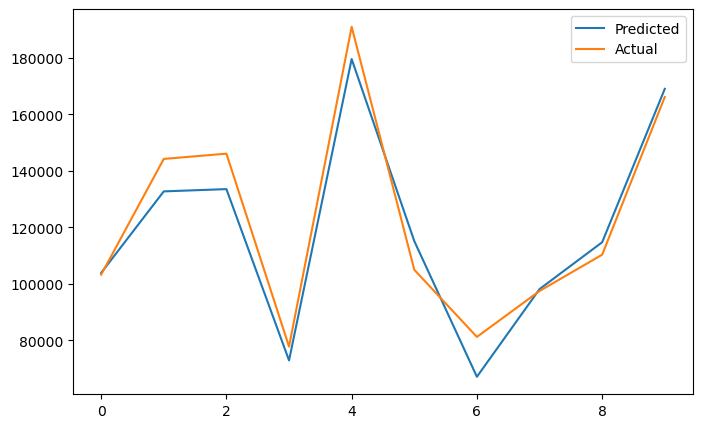

In [42]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# Checking the Mean Squared Error 

In [43]:
# mean_squared_error(y_train, y_pred_train)
Linear_MSE = mean_squared_error(y_test, y_pred_test)
Linear_MSE

77506468.16885416

In [44]:
# MAE
Linear_MAE = mean_absolute_error(y_test, y_pred_test)
Linear_MAE

7320.441614848128

# Root Mean Square Value

In [45]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9052.267248800474

In [46]:
# Test performance
Linear_RMSE = math.sqrt(mean_squared_error(y_test, y_pred_test))
Linear_RMSE

8803.775790469346

In [47]:
# R square
r2_score(y_train, y_pred_train)

0.9499572530324031

In [48]:
r2_score(y_test, y_pred_test)

0.939395591782057

# Adjusted r2

In [49]:
X_test.shape,y_test.shape

((10, 3), (10,))

In [50]:
r2 = r2_score(y_test, y_pred_test)
r2

0.939395591782057

In [51]:
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
radj = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f'Adjusted R-squared: {radj:.4f}')

Adjusted R-squared: 0.9091


# Linear Regression
Mean squared error =77506468.16

Mean absolute error = 7320.44

Root Mean squared error = 8803.77

R2 score for Train Data = 0.9499

R2 score for Test Data = 0.9393

Adjusted R-square = 0.9091